In [ ]:
#Libraries
import numpy as np
import joblib
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
#from tensorflow.keras import regularizers
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
# Read the dataset
data_train = pd.read_csv("KDDTrain+.txt")
# Check data
data_train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,0,tcp,http,SF,315,318,0,0,0,0,...,1.00,0.00,0.01,0.02,0.01,0.00,0.0,0.00,normal,21.0
41469,0,tcp,courier,S0,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
41470,0,tcp,nnsp,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,20.0
41471,0,udp,private,SF,105,147,0,0,0,0,...,0.80,0.01,0.00,0.00,0.00,0.00,0.0,0.00,normal,17.0


# **Data Cleaning and Processing**

In [ ]:
data_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
data_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41468    False
41469    False
41470    False
41471    False
41472    False
Length: 41473, dtype: bool

In [ ]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])
# Assign name for columns
data_train.columns = columns
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15.0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21.0
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21.0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41468,0,tcp,http,SF,315,318,0,0,0,0,...,1.00,0.00,0.01,0.02,0.01,0.00,0.0,0.00,normal,21.0
41469,0,tcp,courier,S0,0,0,0,0,0,0,...,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19.0
41470,0,tcp,nnsp,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.00,1.0,1.00,neptune,20.0
41471,0,udp,private,SF,105,147,0,0,0,0,...,0.80,0.01,0.00,0.00,0.00,0.00,0.0,0.00,normal,17.0


NameError: ignored

# **Visualizations**

In [ ]:
#Printing various outcomes
data_train['outcome'].value_counts()

normal             22042
neptune            13704
satan               1185
ipsweep             1183
portsweep            979
smurf                845
nmap                 492
back                 322
warezclient          317
teardrop             281
pod                   61
guess_passwd          16
buffer_overflow       11
warezmaster           11
rootkit                6
imap                   5
multihop               4
land                   3
phf                    2
ftp_write              1
loadmodule             1
spy                    1
Name: outcome, dtype: int64

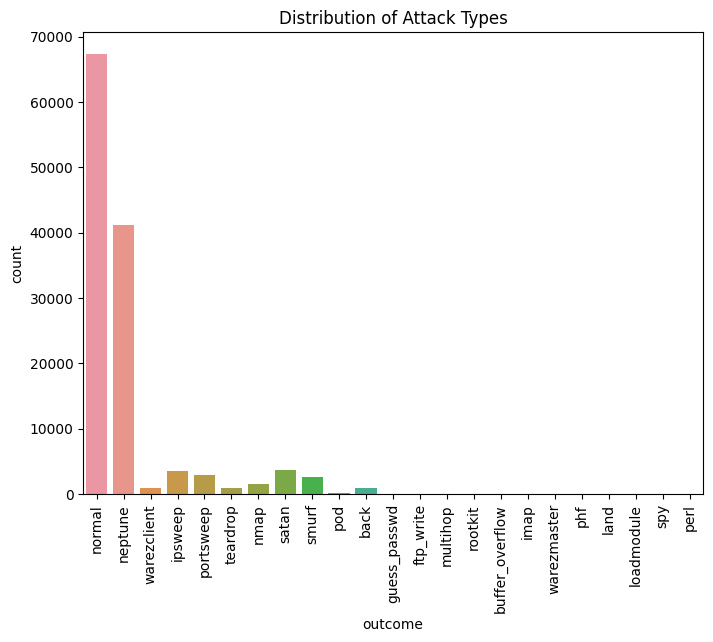

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=data_train)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

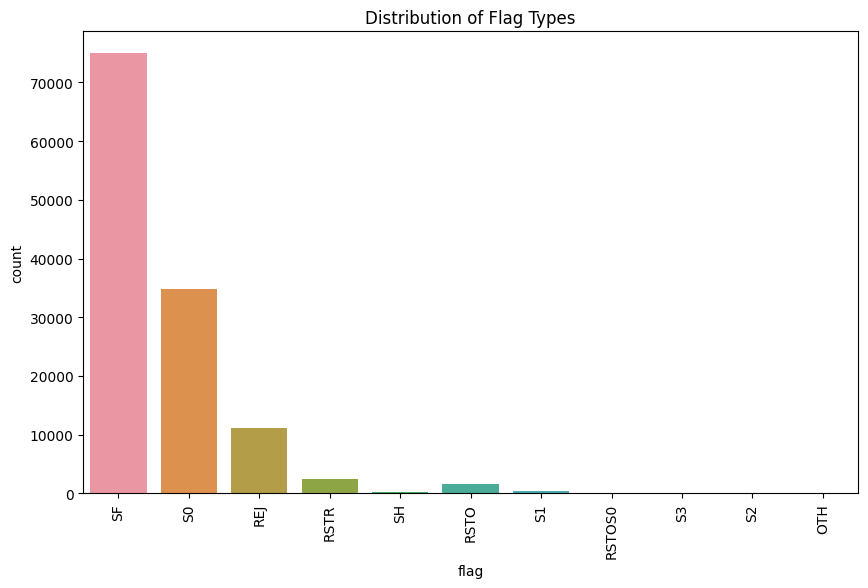

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='flag', data=data_train)
plt.xticks(rotation=90)
plt.title('Distribution of Flag Types')
plt.show()


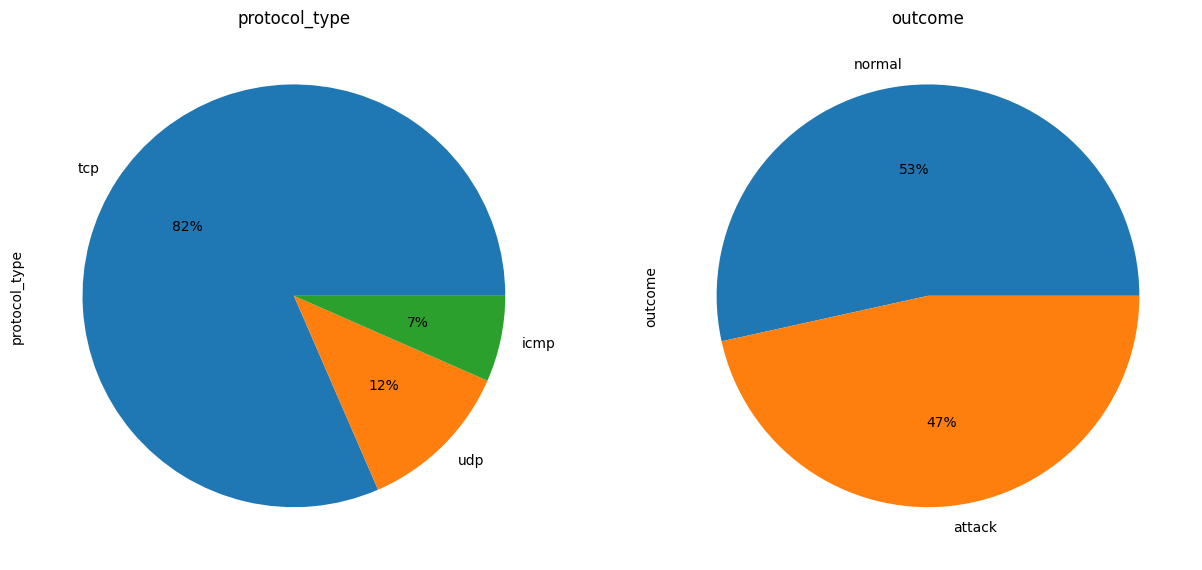

In [ ]:
#If outcome is not normal then it is an attack
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

# **Scaling**

In [ ]:
# This function preprocesses a given DataFrame by:
# 1. Scaling numeric features using RobustScaler.
# 2. Binarizing the 'outcome' column to represent normal (0) or not normal (1) traffic.
# 3. Performing one-hot encoding on categorical columns ('protocol_type', 'service', 'flag').
# The preprocessed DataFrame is returned.

def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login','level','outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe
scaled_train = preprocess(data_train)


In [ ]:
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,15,0.0,0.369565,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.007092,-0.4375,0.0,0.0,0.0,0.0,-1.010989,2.500000,0.00,0.000000,-0.253061,-0.536842,8.285714,14.666667,0.0,0.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,19,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773050,-0.1250,1.0,1.0,0.0,0.0,-1.043956,1.166667,0.00,0.000000,-0.151020,-0.431579,0.428571,0.000000,0.0,1.00,1.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,21,0.0,0.681159,15.800388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.063830,-0.1875,0.2,0.2,0.0,0.0,0.000000,0.000000,0.00,-1.300578,0.783673,0.515789,-0.285714,0.500000,2.0,0.03,0.01,0.00,0.01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,21,0.0,0.561594,0.813953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.113475,1.5000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.09,0.000000,0.783673,0.515789,-0.285714,0.000000,0.0,0.00,0.00,0.00,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,21,0.0,-0.159420,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.758865,0.6875,0.0,0.0,1.0,1.0,-0.923077,1.000000,0.00,0.000000,-0.179592,-0.463158,0.714286,0.000000,0.0,0.00,0.00,1.00,1.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#Created subset data of original data for testing
#We have already made so commented them

#df_thirty = scaled_train.sample(frac=0.3, random_state=42)
#df_twenty = scaled_train.sample(frac=0.2, random_state=42)
#df_ten = scaled_train.sample(frac=0.1, random_state=42)
#df_five = scaled_train.sample(frac=0.05, random_state=42)
#df_fifty = scaled_train.sample(frac=0.5, random_state=42)
#df_fourty = scaled_train.sample(frac=0.4, random_state=42)
#df_fifteen = scaled_train.sample(frac=0.15, random_state=42)
#df_sixty = scaled_train.sample(frac=0.6, random_state=42)
#df_seventy = scaled_train.sample(frac=0.7, random_state=42)
#df_eighty = scaled_train.sample(frac=0.8, random_state=42)

In [ ]:
#df_sixty['outcome'].value_counts()

0    40299
1    35284
Name: outcome, dtype: int64

In [ ]:
#df_seventy['outcome'].value_counts()

0    47163
1    41017
Name: outcome, dtype: int64

In [ ]:
#df_eighty['outcome'].value_counts()

0    53882
1    46896
Name: outcome, dtype: int64

In [ ]:
#df_five['outcome'].value_counts()

0    3343
1    2956
Name: outcome, dtype: int64

In [ ]:
#df_ten['outcome'].value_counts()

0    6692
1    5905
Name: outcome, dtype: int64

In [ ]:
#df_fifteen['outcome'].value_counts()

0    9975
1    8921
Name: outcome, dtype: int64

In [ ]:
#df_fourty['outcome'].value_counts()

0    26724
1    23665
Name: outcome, dtype: int64

In [ ]:
#Converting them to csv
#df_five.to_csv('five_per.csv')
#df_ten.to_csv('ten_per.csv')
#df_twenty.to_csv('twenty_per.csv')

In [ ]:
#df_sixty.to_csv('sixty_per.csv')
#df_seventy.to_csv('seventy_per.csv')
#df_eighty.to_csv('eighty_per.csv')

In [ ]:
#df_fifteen.to_csv('fifteen_per.csv')
#df_fourty.to_csv('fourty_per.csv')

In [ ]:
# 1. Applies PCA to reduce the dimensionality of the feature matrix 'x' to 20 components.
# 2. Splits the data into training and testing sets for classification ('y') and regression ('y_reg') tasks.

x = scaled_train.drop(['outcome', 'level'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 20


# **Modelling**

In [ ]:
# Evaluates the classification 'model' using various metrics for both training and testing data.
# Stores evaluation results in 'kernal_evals' dictionary under 'name'.
# Displays training and testing accuracy, precision, and recall for the model.
# Calculates and visualizes the confusion matrix for actual vs. predicted labels.
# The confusion matrix is displayed with labels 'normal' and 'attack'.


kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))



In [ ]:
#Results
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

Training Accuracy Logistic Regression 87.49417029679391  Test Accuracy Logistic Regression 87.32288152411193
Training Precesion Logistic Regression 86.29863792591335  Test Precesion Logistic Regression 86.44555376935443
Training Recall Logistic Regression 86.87554729715299  Test Recall Logistic Regression 86.5187568803455
